In [6]:
import zipfile
with zipfile.ZipFile('cats_and_dogs.zip','r') as zip_ref:
    zip_ref.extractall()


In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [4]:
from skimage.io import imread
from skimage.transform import resize
import os
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

Categories = ['cats', 'dogs']
flat_data_arr = []  # input array
target_arr = []  # output array

# Iterate through both training and testing categories
for category in Categories:
    print(f'loading... category: {category}')

    # Specify the subdirectories for training and testing
    train_or_test_dirs = ['train', 'test']

    for train_or_test in train_or_test_dirs:
        # Form the complete path
        path = os.path.join(train_or_test, category)

        for img in os.listdir(path):
            img_array = imread(os.path.join(path, img))
            img_resized = resize(img_array, (40, 40, 3))  # Adjust the size as needed
            flat_data_arr.append(img_resized.flatten())
            target_arr.append(Categories.index(category))

        print(f'loaded {train_or_test} category: {category} successfully')

# Convert lists to numpy arrays
flat_data = np.array(flat_data_arr)
target = np.array(target_arr)

# Create DataFrame from flat_data and target
df = pd.DataFrame(flat_data)
df['Target'] = target

# Display the shape of the DataFrame
print(df.shape)


loading... category: cats
loaded train category: cats successfully
loaded test category: cats successfully
loading... category: dogs
loaded train category: dogs successfully
loaded test category: dogs successfully
(697, 4801)


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [6]:
#input data
x=df.iloc[:,:-1]
#output data
y=df.iloc[:,-1]

In [7]:
# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,
											random_state=77,
											stratify=y)

In [8]:
# Defining the parameters grid for GridSearchCV
param_grid={'C':[0.1,1,10,100],
			'gamma':[0.0001,0.001,0.1,1],
			'kernel':['rbf','poly']}

# Creating a support vector classifier
svc=svm.SVC(probability=True)

# Creating a model using GridSearchCV with the parameters grid
model=GridSearchCV(svc,param_grid)

In [9]:
model.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1],
                         'kernel': ['rbf', 'poly']})

In [10]:
# Testing the model using the testing data
y_pred = model.predict(x_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_pred, y_test)

# Print the accuracy of the model
print(f"The model is {accuracy*100}% accurate")

The model is 62.142857142857146% accurate


In [11]:
print(classification_report(y_test, y_pred, target_names=['cat', 'dog']))

              precision    recall  f1-score   support

         cat       0.60      0.71      0.65        70
         dog       0.65      0.53      0.58        70

    accuracy                           0.62       140
   macro avg       0.63      0.62      0.62       140
weighted avg       0.63      0.62      0.62       140



<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\HP\AppData\Local\Temp\ipykernel_14996\3053840874.py:1: SyntaxWarning: invalid escape sequence '\d'
  path='test\dogs\dog_181.jpg'


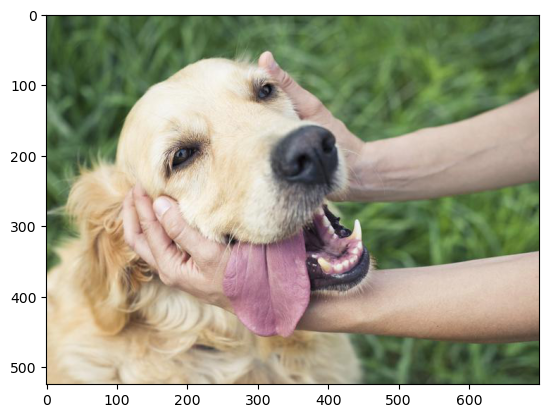

The predicted image is : dogs


In [25]:
path='test\dogs\dog_181.jpg'
img=imread(path)
plt.imshow(img)
plt.show()
img_resize=resize(img,(40,40,3))
l=[img_resize.flatten()]
print("The predicted image is : "+Categories[model.predict(l)[0]])

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\HP\AppData\Local\Temp\ipykernel_14996\797851228.py:1: SyntaxWarning: invalid escape sequence '\c'
  path='test\cats\cat_418.jpg'


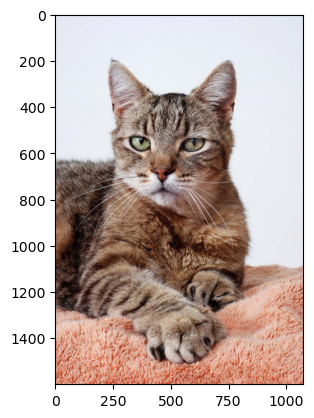

The predicted image is : cats


In [22]:
path='test\cats\cat_418.jpg'
img=imread(path)
plt.imshow(img)
plt.show()
img_resize=resize(img,(40,40,3))
l=[img_resize.flatten()]
print("The predicted image is : "+Categories[model.predict(l)[0]])